# Topic ML In Cricket

In [5]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [6]:
matches=pd.read_csv("matches.csv")


In [7]:
null_columns=matches.isnull().sum()
print(null_columns[null_columns > 0])

city                 7
winner               4
player_of_match      4
umpire1              2
umpire2              2
umpire3            637
dtype: int64


In [8]:
matches=pd.read_csv("C:\\Users\\Soumya\\Desktop\\matches.csv")
matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,5/5/2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,7/5/2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,8/5/2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/5/2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [9]:

conditions = [matches["venue"] == "Rajiv Gandhi International Stadium, Uppal",matches["venue"] == "Maharashtra Cricket Association Stadium",
              matches["venue"] == "Saurashtra Cricket Association Stadium", matches["venue"] == "Holkar Cricket Stadium",
              matches["venue"] == "M Chinnaswamy Stadium",matches["venue"] == "Wankhede Stadium",
              matches["venue"] == "Eden Gardens",matches["venue"] == "Feroz Shah Kotla",
              matches["venue"] == "Punjab Cricket Association IS Bindra Stadium, Mohali",matches["venue"] == "Green Park",
              matches["venue"] == "Punjab Cricket Association Stadium, Mohali",matches["venue"] == "Dr DY Patil Sports Academy",
              matches["venue"] == "Sawai Mansingh Stadium", matches["venue"] == "MA Chidambaram Stadium, Chepauk", 
              matches["venue"] == "Newlands", matches["venue"] == "St George's Park" , 
              matches["venue"] == "Kingsmead", matches["venue"] == "SuperSport Park",
              matches["venue"] == "Buffalo Park", matches["venue"] == "New Wanderers Stadium",
              matches["venue"] == "De Beers Diamond Oval", matches["venue"] == "OUTsurance Oval", 
              matches["venue"] == "Brabourne Stadium",matches["venue"] == "Sardar Patel Stadium", 
              matches["venue"] == "Barabati Stadium", matches["venue"] == "Vidarbha Cricket Association Stadium, Jamtha",
              matches["venue"] == "Himachal Pradesh Cricket Association Stadium",matches["venue"] == "Nehru Stadium",
              matches["venue"] == "Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium",matches["venue"] == "Subrata Roy Sahara Stadium",
              matches["venue"] == "Shaheed Veer Narayan Singh International Stadium",matches["venue"] == "JSCA International Stadium Complex",
              matches["venue"] == "Sheikh Zayed Stadium",matches["venue"] == "Sharjah Cricket Stadium",
              matches["venue"] == "Dubai International Cricket Stadium",matches["venue"] == "M. A. Chidambaram Stadium",
              matches["venue"] == "Feroz Shah Kotla Ground",matches["venue"] == "M. Chinnaswamy Stadium",
              matches["venue"] == "Rajiv Gandhi Intl. Cricket Stadium" ,matches["venue"] == "IS Bindra Stadium",matches["venue"] == "ACA-VDCA Stadium"]
values = ['Hyderabad', 'Mumbai', 'Rajkot',"Indore","Bengaluru","Mumbai","Kolkata","Delhi","Mohali","Kanpur","Mohali","Pune","Jaipur","Chennai","Cape Town","Port Elizabeth","Durban",
          "Centurion",'Eastern Cape','Johannesburg','Northern Cape','Bloemfontein','Mumbai','Ahmedabad','Cuttack','Jamtha','Dharamshala','Chennai','Visakhapatnam','Pune','Raipur','Ranchi',
          'Abu Dhabi','Sharjah','Dubai','Chennai','Delhi','Bengaluru','Hyderabad','Mohali','Visakhapatnam']
matches['city'] = np.where(matches['city'].isnull(),
                              np.select(conditions, values),
                              matches['city'])

In [10]:
null_columns=matches.isnull().sum()
print(null_columns[null_columns > 0])


winner               4
player_of_match      4
umpire1              2
umpire2              2
umpire3            637
dtype: int64


In [11]:

matches=matches[matches["winner"].notna()]
matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,5/5/2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,7/5/2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,8/5/2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/5/2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [12]:

toss_win_result = matches.groupby(['toss_winner']).winner.value_counts().reset_index(name="count")
toss_win_result['result']=np.where(toss_win_result.winner==toss_win_result.toss_winner,'won','lost')
toss_win_result_df = toss_win_result.groupby(['toss_winner','result'])['count'].sum().reset_index()


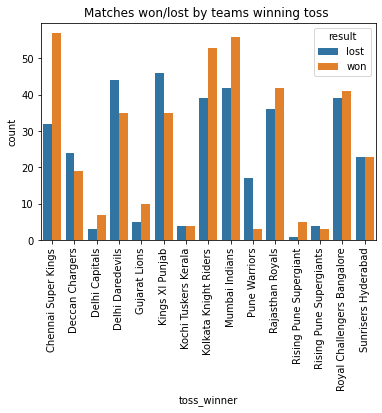

In [13]:
plot = sns.barplot(x="toss_winner", y="count", hue="result", data=toss_win_result_df)
plot.set_title('Matches won/lost by teams winning toss ')
plot.set_xticklabels(toss_win_result_df['toss_winner'].unique(),rotation=90)
plt.show()

In [14]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plot = sns.barplot(x="venue", y="count", hue="decision", data=venue_result)
plot.sevenue_toss_decision_result=matches[["toss_winner","toss_decision","winner","venue"]]
venue_toss_decision_result["decision"]=np.where((venue_toss_decision_result.toss_winner == venue_toss_decision_result.winner) & (venue_toss_decision_result.toss_decision=="field"),"field_won","bat_won")
venue_result=venue_toss_decision_result.groupby(["venue"]).decision.value_counts().reset_index(name="count")
t_title('Teams bat/field first results on venues')
plot.set_xticklabels(venue_result['venue'].unique(),rotation=90)
plt.show()


NameError: name 'venue_result' is not defined

In [ ]:
teams = list(set(matches.loc[:,'team1']))
matches_won = [len(matches.loc[matches['winner'] == i]) for i in teams]
plt.bar(np.arange(len(teams)), matches_won)
plt.xticks(np.arange(len(teams)), teams, rotation='vertical')
plt.ylabel('No. of Matches won')
plt.xlabel('Teams')
plt.title('No of matches won by different teams')

In [ ]:
matches["team2"]=matches["team2"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
matches["team1"]=matches["team1"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
matches["winner"]=matches["winner"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
matches["toss_winner"]=matches["toss_winner"].replace("Rising Pune Supergiant","Rising Pune Supergiants")


In [15]:

encoder= LabelEncoder()
matches["team1"]=encoder.fit_transform(matches["team1"])
matches["team2"]=encoder.fit_transform(matches["team2"])
matches["winner"]=encoder.fit_transform(matches["winner"].astype(str))
matches["toss_winner"]=encoder.fit_transform(matches["toss_winner"])
matches["venue"]=encoder.fit_transform(matches["venue"])



<ipython-input-15-9436755534cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches["team1"]=encoder.fit_transform(matches["team1"])
<ipython-input-15-9436755534cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches["team2"]=encoder.fit_transform(matches["team2"])
<ipython-input-15-9436755534cf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [16]:
matches.loc[matches["winner"]==matches["team1"],"team1_win"]=1
matches.loc[matches["winner"]!=matches["team1"],"team1_win"]=0


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [17]:
matches.loc[matches["toss_winner"]==matches["team1"],"team1_toss_win"]=1
matches.loc[matches["toss_winner"]!=matches["team1"],"team1_toss_win"]=0


In [18]:
matches["team1_bat"]=0
matches.loc[(matches["team1_toss_win"]==1) & (matches["toss_decision"]=="bat"),"team1_bat"]=1


<ipython-input-18-bdf699c90a9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches["team1_bat"]=0


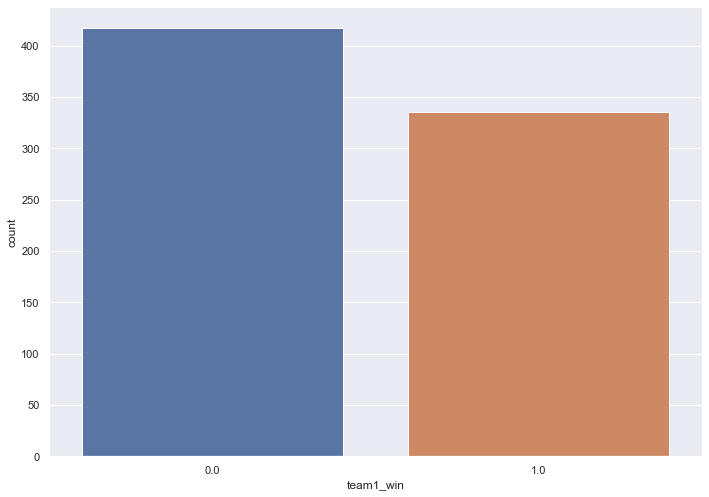

In [19]:
sns.countplot(x="team1_win",data=matches)
plt.show()

In [20]:
prediction_df=matches[["team1","team2","team1_toss_win","team1_bat","team1_win","venue"]]



In [21]:
correlated_features = set()
correlation_matrix = prediction_df.drop('team1_win', axis=1).corr()
correlation_matrix

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

prediction_df.drop(columns=correlated_features)


,team1,team2,team1_toss_win,team1_win,venue
0,14,13,0.0,1.0,28
1,8,11,0.0,0.0,21
2,4,7,0.0,0.0,31
3,11,5,0.0,0.0,13
4,13,3,1.0,1.0,17
...,...,...,...,...,...
751,7,8,0.0,0.0,40
752,0,8,1.0,0.0,18
753,14,2,0.0,0.0,0
754,2,0,0.0,0.0,0


# MODELS

In [22]:
X = prediction_df.drop('team1_win', axis=1)
target = prediction_df['team1_win']
target=target.astype(int)


In [23]:
logReg=LogisticRegression(solver='lbfgs')
rfe = RFE(logReg, 20)
rfe = rfe.fit(X, target.values.ravel())

print(rfe.support_)


[ True  True  True  True  True]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [24]:
#splitting the data set
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# SVM

In [64]:
svm=SVC()
svm.fit(X_train,y_train)
svm.score(X_test,y_test)
y_pred = svm.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy of SVM classifier on test set: {:.4f}'.format(svm.score(X_test, y_test)))


[[93  2]
 [48  8]]
              precision    recall  f1-score   support

           0       0.66      0.98      0.79        95
           1       0.80      0.14      0.24        56

    accuracy                           0.67       151
   macro avg       0.73      0.56      0.52       151
weighted avg       0.71      0.67      0.59       151

Accuracy of SVM classifier on test set: 0.6689


# ROC CURVE

AUC Score: 
0.5609022556390977


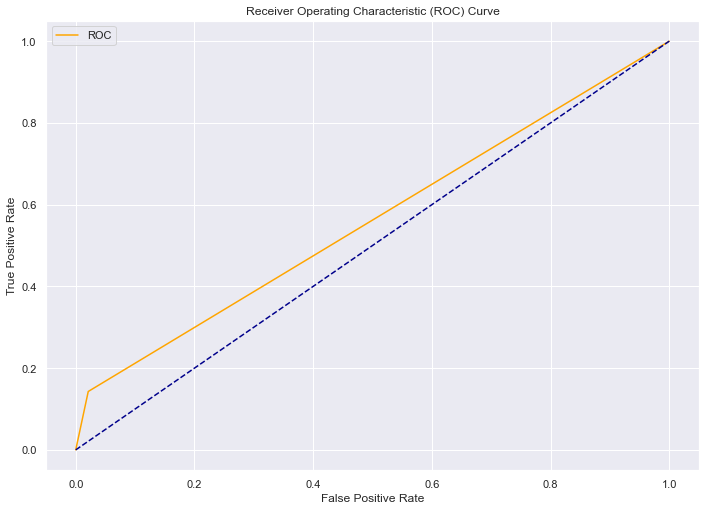

In [65]:
auc = roc_auc_score(y_test, y_pred)
print("AUC Score: ")
print(auc)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# DecisionTreeClassifier

In [28]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree.score(X_test,y_test)
y_pred = dtree.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy of decision tree classifier on test set: {:.4f}'.format(dtree.score(X_test, y_test)))


[[62 33]
 [25 31]]
              precision    recall  f1-score   support

           0       0.71      0.65      0.68        95
           1       0.48      0.55      0.52        56

    accuracy                           0.62       151
   macro avg       0.60      0.60      0.60       151
weighted avg       0.63      0.62      0.62       151

Accuracy of decision tree classifier on test set: 0.6159


In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve

# RandomForestClassifier

In [67]:

randomForest= RandomForestClassifier(n_estimators=100)
randomForest.fit(X_train,y_train)
randomForest.score(X_test,y_test)
y_pred = randomForest.predict(X_test)
print("Confusion matrix\n",confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy of random forest classifier on test set: {:.4f}'.format(randomForest.score(X_test, y_test)))

Confusion matrix
 [[58 37]
 [30 26]]
              precision    recall  f1-score   support

           0       0.66      0.61      0.63        95
           1       0.41      0.46      0.44        56

    accuracy                           0.56       151
   macro avg       0.54      0.54      0.54       151
weighted avg       0.57      0.56      0.56       151

Accuracy of random forest classifier on test set: 0.5563


AUC Score: 
0.537406015037594


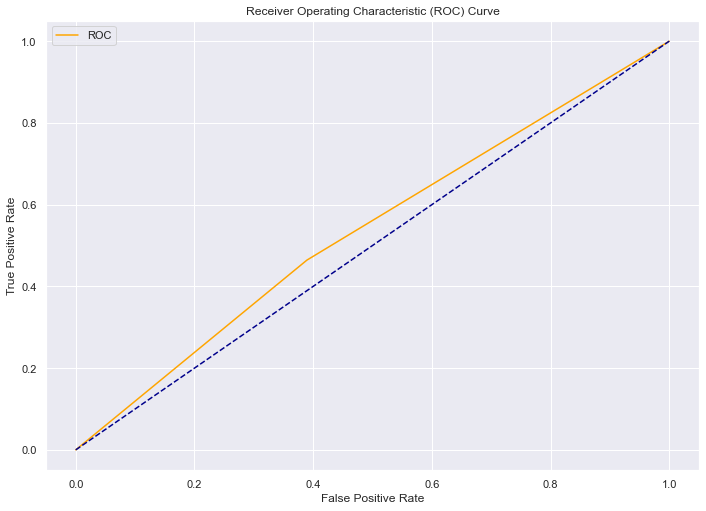

In [68]:
auc = roc_auc_score(y_test, y_pred)
print("AUC Score: ")
print(auc)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [34]:
X = prediction_df.drop('team1_win', axis=1)
target = prediction_df['team1_win']
target=target.astype(int)

# Logistic regression 

In [36]:
from sklearn.metrics import plot_confusion_matrix,confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
from sklearn import metrics
lr_pred = log_reg.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print('Accuracy for test: ',accuracy_score(y_test,lr_pred))

Accuracy for test:  0.6225165562913907


Text(0.5, 1.0, 'Confusion Matrix')

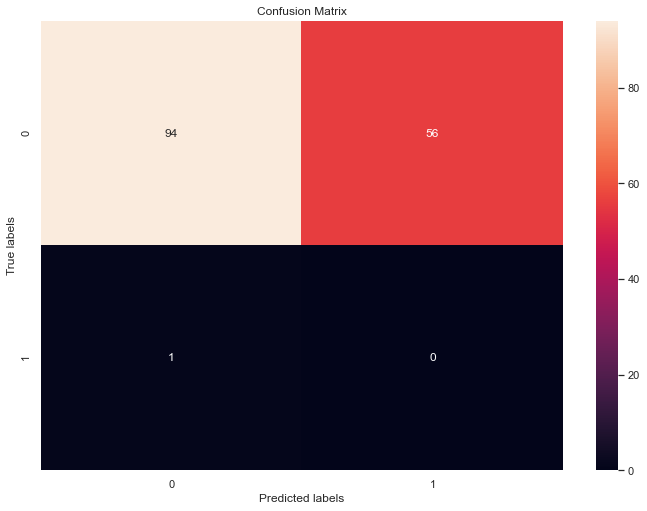

In [38]:
confusion_matrix(lr_pred, y_test)
ax= plt.subplot()
sns.heatmap(confusion_matrix(lr_pred, y_test), annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [39]:
from sklearn.metrics import classification_report 

print(classification_report(lr_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.63      0.77       150
           1       0.00      0.00      0.00         1

    accuracy                           0.62       151
   macro avg       0.49      0.31      0.38       151
weighted avg       0.98      0.62      0.76       151



# knn

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

In [46]:
accuracy = accuracy_score(y_test, knn_pred)*100
knn=print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 54.3 %.


Text(0.5, 1.0, 'Confusion Matrix')

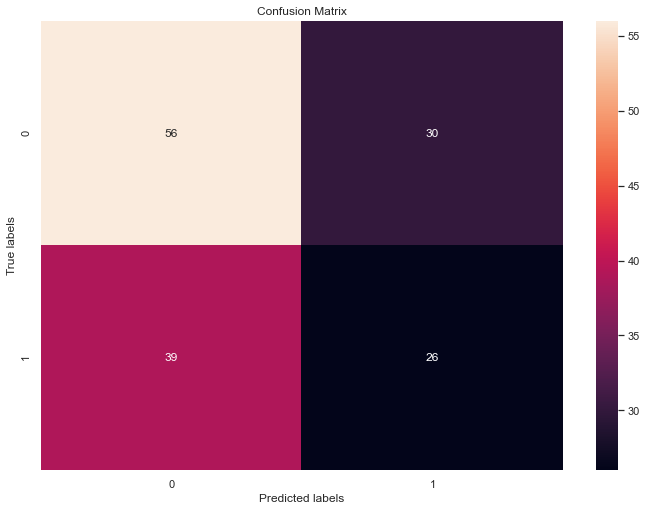

In [47]:
confusion_matrix(knn_pred, y_test)
ax= plt.subplot()
sns.heatmap(confusion_matrix(knn_pred, y_test), annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [48]:
print(classification_report(knn_pred,y_test))

              precision    recall  f1-score   support

           0       0.59      0.65      0.62        86
           1       0.46      0.40      0.43        65

    accuracy                           0.54       151
   macro avg       0.53      0.53      0.52       151
weighted avg       0.54      0.54      0.54       151



# ROC curve

In [50]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [51]:
log_model = LogisticRegression()
knn_model = KNeighborsClassifier()
modeldt1 = DecisionTreeClassifier()

In [52]:
models = [
    {
        'label': 'Logistic Regression',
        'model': log_model
    },
    {
        'label': 'KNN Classifier',
        'model': knn_model
    },
    {
        'label': 'Decision Tree',
        'model': modeldt1
    }
]

<Figure size 842.4x595.44 with 0 Axes>

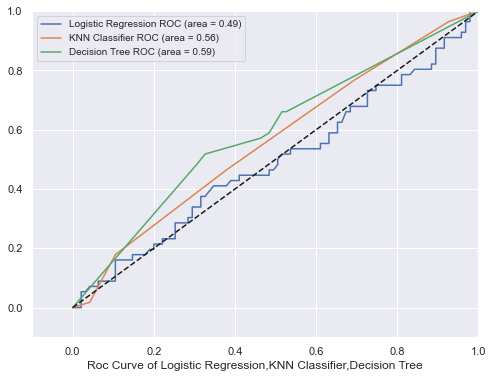

In [53]:
plt.clf()
plt.figure(figsize=(8,6))
for m in models:
    m['model'].probability = True
    probas = m['model'].fit(X_train,y_train).predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.1, 1.0])
plt.ylim([-0.1, 1.0])
plt.xlabel('Roc Curve of Logistic Regression,KNN Classifier,Decision Tree')
plt.ylabel('')
plt.legend(loc=0, fontsize='small')
plt.show()

# pca

In [54]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[-7.31652289e+00,  1.94177105e+00, -8.71483686e+00,
        -4.02550913e-01,  1.67910891e-17],
       [ 1.94748280e-02, -1.53358069e+00, -3.90919874e+00,
        -5.07001471e-01,  2.56881526e-17],
       [-9.64513820e+00, -2.51562128e+00,  2.22358600e+00,
        -6.47723343e-01,  1.45112563e-15],
       ...,
       [ 2.09972918e+01,  9.04003969e+00, -1.43893905e+00,
        -3.40975131e-01,  1.69777017e-17],
       [ 2.16268936e+01,  6.38482086e-01,  7.33328929e+00,
        -5.96790197e-01,  2.94836050e-17],
       [-7.61153977e+00,  4.89765623e+00,  5.34471356e+00,
         8.24131535e-01,  1.43738428e-17]])

In [55]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([7.73410730e-01, 1.25529247e-01, 9.82921882e-02, 2.76783425e-03,
       1.82397044e-35])

Text(0, 0.5, 'Cumulative explained variance')

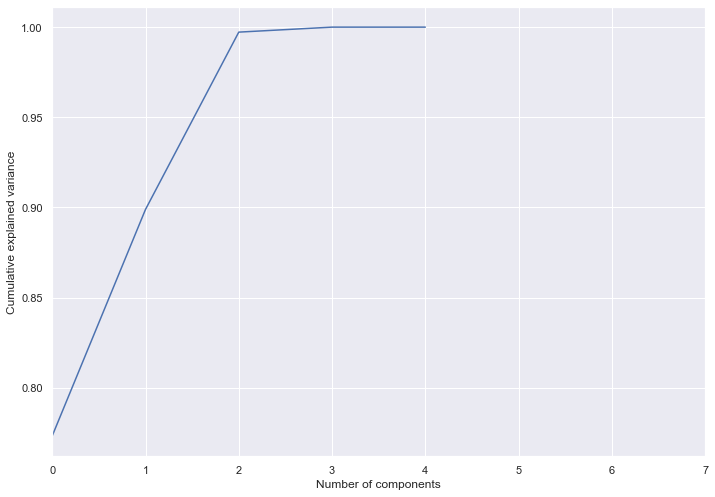

In [56]:
#PCA Using scikit-learn Plotting
from sklearn.decomposition import PCA
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,7,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

# Hyperparameter Tuning 

# Logistic Regression

In [69]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.949333 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.938000 (0.026255) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.938333 (0.022816) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.939667 (0.024012) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.938333 (0.025571) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.938667 (0.023767) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.939667 (0.024012) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.939000 (0.024406) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.941667 (0.023535) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.940333 (0.023450) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.942000 (0.024000) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.943000 (0.024920) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.944000 (0.023324) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.948667 (0.019956) wi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(




Accuracy:  0.955
f1-score: 0.9577464788732395
Precision score:  0.9357798165137615
Recall score:  0.9807692307692307
MCC:  0.910822321998531
Mean Squared Error: 0.21213203435596426
Mean Absolute Error: 0.21213203435596426


              precision    recall  f1-score   support

           0       0.98      0.93      0.95        96
           1       0.94      0.98      0.96       104

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.96      0.95      0.95       200





Text(0.5, 1.0, 'Confusion Matrix')

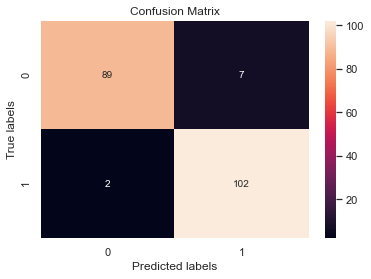

In [162]:
model_LR = log_reg_cv.best_estimator_
model_LR.fit(X_train,y_train)
predictions_LR =  model_LR.predict(X_test)
print('\n')
print('Accuracy: ', accuracy_score(y_test,predictions_LR))
print('f1-score:', f1_score(y_test, predictions_LR))
print('Precision score: ', precision_score(y_test,predictions_LR))
print('Recall score: ', recall_score(y_test,predictions_LR))
print('MCC: ',matthews_corrcoef(y_test,predictions_LR) )
print('Mean Squared Error:', mean_squared_error(y_test, predictions_LR) ** 0.5)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions_LR) ** 0.5)
print('\n')
print(classification_report(y_test, predictions_LR))
print('\n')
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, predictions_LR), annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# PCA of Logistic Regression

In [94]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 6)
pca.fit(X)
X_pca = pca.transform(X)


print("PCA is ", X_pca)
print("Explained variance Ratio  is : ", pca.explained_variance_ratio_)
print("Singular Values is: ", pca.singular_values_)

PCA is  [[  9.66117688  -1.58867657  -8.3047311    0.88563115   0.29919622
    0.13413344]
 [  0.30774104  12.22295907  -4.4109088    0.95669091   3.24138422
    4.36764427]
 [-13.58570141   4.73351834  -1.99969334   0.90511051  -0.27987932
    2.57673407]
 ...
 [ -1.66100922  -0.90983451   2.71712733  -0.91811122   0.42449185
    1.19019275]
 [ -5.55031896   0.70716163   6.47521578   2.74673293  -3.53632282
    2.49578567]
 [  4.34187923  -2.17760891   3.87731955   1.82106618   4.89849083
    0.38331136]]
Explained variance Ratio  is :  [0.34924549 0.19381789 0.14382455 0.06632636 0.04411952 0.03553911]
Singular Values is:  [283.52924559 211.21725212 181.94870565 123.55932528 100.77385502
  90.44524988]


In [97]:
logr_pred = log_reg.predict(X_test)

In [98]:
accuracyLR = accuracy_score(y_test,logr_pred)
accuracyLR

0.6225165562913907

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(




Accuracy:  0.955
f1-score: 0.9577464788732395
Precision score:  0.9357798165137615
Recall score:  0.9807692307692307
MCC:  0.910822321998531
Mean Squared Error: 0.21213203435596426
Mean Absolute Error: 0.21213203435596426


              precision    recall  f1-score   support

           0       0.98      0.93      0.95        96
           1       0.94      0.98      0.96       104

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.96      0.95      0.95       200





Text(0.5, 1.0, 'Confusion Matrix')

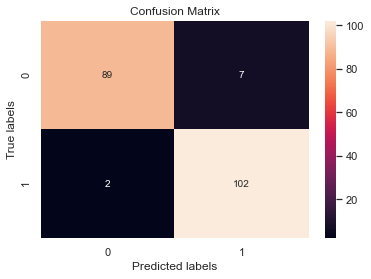

In [130]:
log_reg.fit(X_train,y_train)
predictions_LR =  log_reg.predict(X_test)
print('\n')
print('Accuracy: ', accuracy_score(y_test,predictions_LR))
print('f1-score:', f1_score(y_test, predictions_LR))
print('Precision score: ', precision_score(y_test,predictions_LR))
print('Recall score: ', recall_score(y_test,predictions_LR))
print('MCC: ',matthews_corrcoef(y_test,predictions_LR) )
print('Mean Squared Error:', mean_squared_error(y_test, predictions_LR) ** 0.5)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions_LR) ** 0.5)
print('\n')
print(classification_report(y_test, predictions_LR))
print('\n')
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, predictions_LR), annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# KNN

In [100]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
# define dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
     print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.969667 using {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'uniform'}
0.849000 (0.034288) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.849000 (0.034288) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.917000 (0.027946) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.917000 (0.027946) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.943000 (0.019348) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.943000 (0.019348) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.950667 (0.024349) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.950667 (0.024349) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.961333 (0.018750) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.961333 (0.018750) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.967000 

In [101]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 6)
pca.fit(X)
X_pca = pca.transform(X)


print("PCA is ", X_pca)
print("Explained variance Ratio  is : ", pca.explained_variance_ratio_)
print("Singular Values is: ", pca.singular_values_)

PCA is  [[-24.99470403  29.37570417  10.11978049   3.25998189   6.5093498
  -16.07583899]
 [-36.2691163    0.15031885  -0.55901028  17.45389201 -20.99064023
    8.66093556]
 [ 37.25113112 -49.01062478 -34.53118855 -31.13966495  16.56579424
  -16.81118768]
 ...
 [-56.90656781  15.94670466  29.25806869 -10.0617021   53.48105683
  -18.24469974]
 [ 67.87998783   2.33891207 -21.45487014  14.43645917 -23.42395359
   -9.17195109]
 [ 75.38161586  11.16686065  47.11672374 -16.2848634   20.31709613
    8.28575837]]
Explained variance Ratio  is :  [0.05196342 0.01608239 0.01588672 0.01519363 0.01493298 0.01460382]
Singular Values is:  [1474.0491523   820.04646172  815.04235214  797.06516367  790.19883811
  781.44125573]


In [102]:
accuracyKNN = accuracy_score(y_test,logr_pred)
accuracyLR

0.6225165562913907

# svm

In [72]:
# example of grid searching key hyperparametres for SVC
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# define dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define model and parameters
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.969333 using {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.965333 (0.018750) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.965667 (0.017259) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.939667 (0.022133) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.965333 (0.018750) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.965667 (0.017259) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.951000 (0.021502) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.965667 (0.017829) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.965667 (0.016469) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.965333 (0.015434) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.963000 (0.018102) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.968333 (0.016347) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.969333 (0.015691) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.963000 (0.018102) with: {'C': 0.01, 'gamma': 'sca

In [115]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 6)
pca.fit(X)
X_pca = pca.transform(X)


print("PCA is ", X_pca)
print("Explained variance Ratio  is : ", pca.explained_variance_ratio_)
print("Singular Values is: ", pca.singular_values_)

PCA is  [[-24.99355369  18.52913602  21.48144572   4.77796955 -24.37143483
   27.46606968]
 [-36.26829647  -7.52611853   5.50318339  -9.44252933 -28.12670307
   -3.69701544]
 [ 37.25108544 -26.5189319  -57.5377036   39.53081766   3.28371605
   24.20176284]
 ...
 [-56.90657678  -3.80176927  28.60273763  22.70480964  45.42027308
   37.92249991]
 [ 67.87904805  12.99781723  -8.99296832  -6.51337437  -5.57121153
  -15.52609938]
 [ 75.38189704 -13.84253558  42.37282724  13.34720569  -7.68782771
   24.07187629]]
Explained variance Ratio  is :  [0.05196342 0.0159125  0.01587057 0.01524278 0.01489667 0.01473723]
Singular Values is:  [1474.04915251  815.70352255  814.62800911  798.35342309  789.23735953
  785.00244876]


In [116]:
accuracyLR = accuracy_score(y_test,logr_pred)
accuracyLR

0.955

# Random Forest

In [73]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# define dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.965667 using {'max_features': 'log2', 'n_estimators': 1000}
0.855667 (0.037030) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.950000 (0.026957) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.960667 (0.022351) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.850333 (0.033415) with: {'max_features': 'log2', 'n_estimators': 10}
0.952333 (0.024991) with: {'max_features': 'log2', 'n_estimators': 100}
0.965667 (0.021242) with: {'max_features': 'log2', 'n_estimators': 1000}


In [117]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 6)
pca.fit(X)
X_pca = pca.transform(X)


print("PCA is ", X_pca)
print("Explained variance Ratio  is : ", pca.explained_variance_ratio_)
print("Singular Values is: ", pca.singular_values_)

PCA is  [[-24.99361193  13.06435998 -31.289028     4.3171185  -14.938657
  -42.25469831]
 [-36.26966836  -5.02816771   4.09294599   6.39693301 -31.81341268
  -11.22097034]
 [ 37.25132344 -37.58166576  29.16287191 -22.9377095   -4.13330546
  -10.41154348]
 ...
 [-56.90641109  30.74372503 -11.73589056 -32.86106339  41.07416834
  -35.90654354]
 [ 67.8795347  -16.36325385  -8.85820235   8.40098853 -19.48333473
   24.44635882]
 [ 75.38140648  42.118807    -1.13611833  -4.61491945   5.98482677
  -30.06480422]]
Explained variance Ratio  is :  [0.05196342 0.01590843 0.01587033 0.01511624 0.01488377 0.01462536]
Singular Values is:  [1474.04915151  815.59903959  814.62184658  795.03280907  788.89556086
  782.01721849]


In [127]:
grid = {"n_estimators" : np.arange(0,200,2)}
rf = RandomForestClassifier()
rf_random = GridSearchCV(rf, grid, cv=3)
rf_random.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 134, in _validate_estimator
    raise ValueError("n_estimators must be greater than zero, "
ValueError: n_estimators must be greater than zero, got 0.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
        26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
        52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
        78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102,
       104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128,
       130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154,
       156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180,
       182, 184, 186, 188, 190, 192, 194, 196, 198])})

# Hyperparameter tuning of Random forest



Accuracy:  0.96
f1-score: 0.9619047619047619
Precision score:  0.9528301886792453
Recall score:  0.9711538461538461
MCC:  0.9199924415434576
Mean Squared Error: 0.2
Mean Absolute Error: 0.2


              precision    recall  f1-score   support

           0       0.97      0.95      0.96        96
           1       0.95      0.97      0.96       104

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200





Text(0.5, 1.0, 'Confusion Matrix')

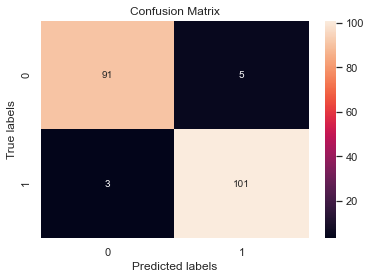

In [128]:
#Hyperparameter Tuning of Random Forest
model_RF = rf_random.best_estimator_
model_RF.fit(X_train,y_train)
predictions_RF =  model_RF.predict(X_test)
print('\n')
print('Accuracy: ', accuracy_score(y_test,predictions_RF))
print('f1-score:', f1_score(y_test, predictions_RF))
print('Precision score: ', precision_score(y_test,predictions_RF))
print('Recall score: ', recall_score(y_test,predictions_RF))
print('MCC: ',matthews_corrcoef(y_test,predictions_RF) )
print('Mean Squared Error:', mean_squared_error(y_test, predictions_RF) ** 0.5)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions_RF) ** 0.5)
print('\n')
print(classification_report(y_test, predictions_RF))
print('\n')
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, predictions_RF), annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# PCA of Random Forest



Accuracy:  0.93
f1-score: 0.9326923076923077
Precision score:  0.9326923076923077
Recall score:  0.9326923076923077
MCC:  0.8597756410256411
Mean Squared Error: 0.2645751311064591
Mean Absolute Error: 0.2645751311064591


              precision    recall  f1-score   support

           0       0.93      0.93      0.93        96
           1       0.93      0.93      0.93       104

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200





Text(0.5, 1.0, 'Confusion Matrix')

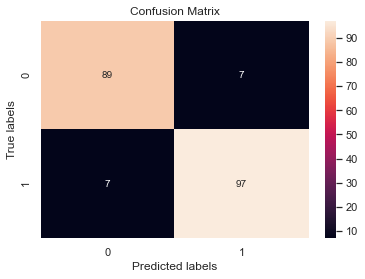

In [129]:
#PCA for Random Forest
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print('\n')
print('Accuracy: ', accuracy_score(y_test,predictions))
print('f1-score:', f1_score(y_test, predictions))
print('Precision score: ', precision_score(y_test,predictions))
print('Recall score: ', recall_score(y_test,predictions))
print('MCC: ',matthews_corrcoef(y_test,predictions) )
print('Mean Squared Error:', mean_squared_error(y_test, predictions) ** 0.5)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions) ** 0.5)
print('\n')
print(classification_report(y_test, predictions))
print('\n')
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Ensemble methods

# Adaboost

In [74]:
import sklearn
print(sklearn.__version__)

0.23.1


In [75]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


In [76]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
# define the model
model = AdaBoostClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Accuracy: 0.806 (0.041)


In [77]:
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
# define the model
model = AdaBoostClassifier()
model.fit(X, y)
# make a single prediction
row = [[-3.47224758,1.95378146,0.04875169,-0.91592588,-3.54022468,1.96405547,-7.72564954,-2.64787168,-1.81726906,-1.67104974,2.33762043,-4.30273117,0.4839841,-1.28253034,-10.6704077,-0.7641103,-3.58493721,2.07283886,0.08385173,0.91461126]]
yhat = model.predict(row)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 0


# AdaBoost for Regression

In [78]:
from sklearn.datasets import make_regression
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=6)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


In [79]:
# evaluate adaboost ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import AdaBoostRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=6)
# define the model
model = AdaBoostRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


MAE: -72.507 (5.425)


In [80]:
from sklearn.datasets import make_regression
from sklearn.ensemble import AdaBoostRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=6)
# define the model
model = AdaBoostRegressor()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [[1.20871625,0.88440466,-0.9030013,-0.22687731,-0.82940077,-1.14410988,1.26554256,-0.2842871,1.43929072,0.74250241,0.34035501,0.45363034,0.1778756,-1.75252881,-1.33337384,-1.50337215,-0.45099008,0.46160133,0.58385557,-1.79936198]]
yhat = model.predict(row)
print('Prediction: %d' % yhat[0])

Prediction: 0


# AdaBoost Hyperparameters

>10 0.773 (0.039)
>50 0.806 (0.041)
>100 0.801 (0.032)
>500 0.793 (0.028)
>1000 0.791 (0.032)
>5000 0.782 (0.031)


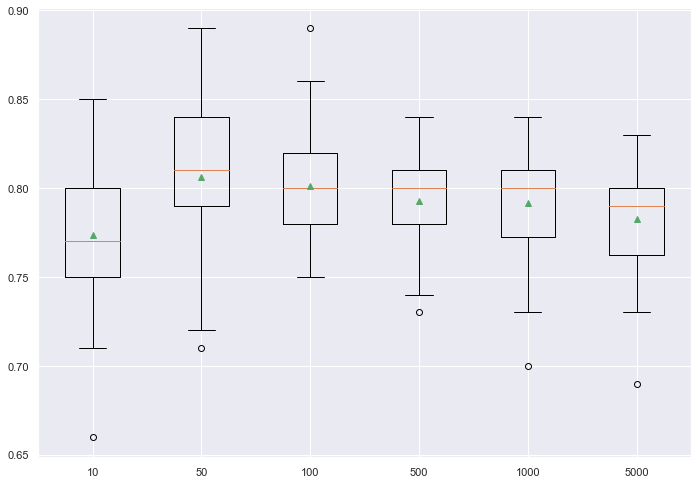

In [81]:
# explore adaboost ensemble number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
return X, y
def get_models():
models = dict()
n_trees = [10, 50, 100, 500, 1000, 5000]
for n in n_trees:
models[str(n)] = AdaBoostClassifier(n_estimators=n)
return models
def evaluate_model(model, X, y):
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
return scores
X, y = get_dataset()
models = get_models()
results, names = list(), list()
for name, model in models.items():
scores = evaluate_model(model, X, y)
# store the results
results.append(scores)
names.append(name)
# summarize the performance along the way
print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Decision tree classifier on adaboost 

>1 0.806 (0.041)
>2 0.863 (0.028)
>3 0.868 (0.027)
>4 0.895 (0.030)
>5 0.914 (0.023)
>6 0.928 (0.020)
>7 0.930 (0.024)
>8 0.929 (0.026)
>9 0.938 (0.020)
>10 0.931 (0.026)


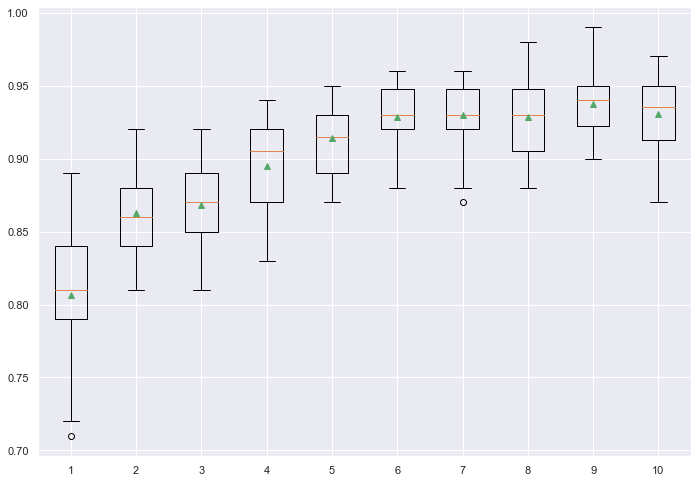

In [83]:
# explore adaboost ensemble tree depth effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
return X, y

# get a list of models to evaluate
def get_models():
models = dict()
# explore depths from 1 to 10
for i in range(1,11):
# define base model
base = DecisionTreeClassifier(max_depth=i)
# define ensemble model
models[str(i)] = AdaBoostClassifier(base_estimator=base)
return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
# evaluate the model
scores = evaluate_model(model, X, y)
# store the results
results.append(scores)
names.append(name)
print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()


In [122]:
#Hyperparameter Tuning of AdaBoost
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
# define the model
model = AdaBoostClassifier(base_estimator=LogisticRegression())
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.794 (0.032)


In [123]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 6)
pca.fit(X)
X_pca = pca.transform(X)


print("PCA is ", X_pca)
print("Explained variance Ratio  is : ", pca.explained_variance_ratio_)
print("Singular Values is: ", pca.singular_values_)

PCA is  [[  9.66117688  -1.58867657  -8.3047311    0.88563115   0.29919622
    0.13413344]
 [  0.30774104  12.22295907  -4.4109088    0.95669091   3.24138422
    4.36764427]
 [-13.58570141   4.73351834  -1.99969334   0.90511051  -0.27987932
    2.57673407]
 ...
 [ -1.66100922  -0.90983451   2.71712733  -0.91811122   0.42449185
    1.19019275]
 [ -5.55031896   0.70716163   6.47521578   2.74673293  -3.53632282
    2.49578567]
 [  4.34187923  -2.17760891   3.87731955   1.82106618   4.89849083
    0.38331136]]
Explained variance Ratio  is :  [0.34924549 0.19381789 0.14382455 0.06632636 0.04411952 0.03553911]
Singular Values is:  [283.52924559 211.21725212 181.94870565 123.55932528 100.77385502
  90.44524988]


# Conclusion

In [ ]:
# |   Model              /Without PCA /HYperParameter Tuning |With PCA
# --------------------------------------------------------------------
# | Logistic Regression /   0.622    /  0.95               |0.95
# --------------------------------------------------------------------
# |  Random Forest     /    0.56   / 0.96               |0.93
# -------------------------------------------------------------------


# Clustering

# DBSCAN Clustering

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

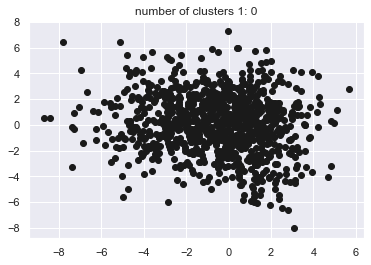

In [137]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn import metrics 

from sklearn.preprocessing import StandardScaler 
from sklearn import datasets 
  
# Load data in X 
db = DBSCAN(eps=0.3, min_samples=10).fit(X) 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool) 
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_ 
  
# Number of clusters in labels, ignoring noise if present. 
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 
  
print(labels) 
  
# Plot result 
import matplotlib.pyplot as plt 
  
# Black removed and is used for noise instead. 
unique_labels = set(labels) 
colors = ['y', 'b', 'g', 'r'] 
print(colors) 
for k, col in zip(unique_labels, colors): 
    if k == -1: 
        # Black used for noise. 
        col = 'k'
  
    class_member_mask = (labels == k) 
  
    xy = X[class_member_mask & core_samples_mask] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
                                      markeredgecolor='k',  
                                      markersize=6) 
  
    xy = X[class_member_mask & ~core_samples_mask] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
                                      markeredgecolor='k', 
                                      markersize=6) 
    plt.title('number of clusters 1: %d' %n_clusters_) 
    plt.show()  

In [138]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [142]:
from sklearn import preprocessing

In [143]:
label_encoder = preprocessing.LabelEncoder() 

In [145]:
matches['city']= label_encoder.fit_transform(matches['city']) 
matches['city'].unique()

<ipython-input-145-8fffa40ea966>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches['city']= label_encoder.fit_transform(matches['city'])


array([15, 27, 29, 16,  2, 24, 22, 10,  7, 19, 17,  8,  5, 26, 13,  6, 14,
       18, 20,  4,  1,  9, 25, 11, 21, 32, 28, 30,  0, 31, 12, 23,  3])

In [147]:
matches['date']= label_encoder.fit_transform(matches['date']) 
matches['date'].unique()

<ipython-input-147-c52f401473fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches['date']= label_encoder.fit_transform(matches['date'])


array([286, 292, 296, 302, 309, 103, 110, 117, 124, 131, 138, 146, 154,
       164, 174, 184, 194, 204, 213, 223, 241, 250, 259, 267, 278, 317,
       411, 468, 480, 490, 501, 510, 519, 528, 326, 335, 344, 353, 362,
       378, 386, 402, 425, 155, 165, 176, 185, 195, 205, 214, 224, 233,
       242, 251, 260, 270, 310, 403, 444, 460, 472, 482, 493, 502, 511,
       520, 456, 318, 327, 336, 345, 354, 363, 371, 379, 387, 394, 412,
       419, 433, 437, 449, 451, 469, 471, 529, 156, 166, 177, 186, 196,
       206, 215, 225, 234, 243, 252, 261, 271, 311, 404, 461, 473, 483,
       494, 503, 512, 521, 319, 328, 337, 346, 355, 364, 372, 380, 388,
       395, 413, 420, 426, 434, 438,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        96, 175, 268, 279, 283, 289, 293, 297, 303,  97, 104, 111, 118,
       125, 132, 139, 147, 157, 167, 187, 197, 216, 226, 298, 304,  98,
       105, 112, 119, 126, 133, 140, 148, 158, 168, 178, 188, 19

# Xgboost

In [151]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: xgboost in c:\programdata\anaconda3\lib\site-packages (1.3.1)



In [154]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [155]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

[18:46:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [156]:

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]


In [157]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.00%
